<img src="https://www.epfl.ch/about/overview/wp-content/uploads/2020/07/logo-epfl-1024x576.png" style="padding-right:10px;width:140px;float:left"></td>
<h2 style="white-space: nowrap">Image Processing Laboratory Notebooks</h2>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">
This Juypter notebook is part of a series of computer laboratories which are designed
to teach image-processing programming; they are running on the EPFL's Noto server. They are the practical complement of the theoretical lectures of the EPFL's Master course <b>Image Processing II</b> 
(<a href="https://moodle.epfl.ch/course/view.php?id=463">MICRO-512</a>) taught by Dr. D. Sage, Dr. M. Liebling, Prof. M. Unser and Prof. D. Van de Ville.
</p>
<p style="font-size:0.85em; margin:2px; text-align:justify">
The project is funded by the Center for Digital Education and the School of Engineering. It is owned by the <a href="http://bigwww.epfl.ch/">Biomedical Imaging Group</a>. 
The distribution or the reproduction of the notebook is strictly prohibited without the written consent of the authors.  &copy; EPFL 2022.
</p>
<p style="font-size:0.85em; margin:0px"><b>Authors</b>: 
    <a href="mailto:pol.delaguilapla@epfl.ch">Pol del Aguila Pla</a>, 
    <a href="mailto:kay.lachler@epfl.ch">Kay Lächler</a>,
    <a href="mailto:alejandro.nogueronaramburu@epfl.ch">Alejandro Noguerón Arámburu</a>,
    <a href="mailto:daniel.sage@epfl.ch">Daniel Sage</a>, and
    <a href="mailto:kamil.seghrouchni@epfl.ch">Kamil Seghrouchni</a>.
     
</p>
<hr style="clear:both">
<h1>Lab 4.1: Orientation warm-up</h1>
<div style="background-color:#F0F0F0;padding:4px">
    <p style="margin:4px;"><b>Released</b>: Thursday March 3, 2022</p>
    <p style="margin:4px;"><b>Submission</b>: <span style="color:red">Friday March 11, 2022</span> (before 11:59PM) on <a href="https://moodle.epfl.ch/course/view.php?id=463">Moodle</a></p>
    <p style="margin:4px;"><b>Grade weigth</b>: Lab 4 (18 points), 7.5 % of the overall grade</p>
    <p style="margin:4px;"><b>Remote help</b>: Monday 7 March, 2022 on Zoom (12h-13h, see Moodle for link) and Thursday 10 March on campus</p>    
    <p style="margin:4px;"><b>Related lectures</b>: Chapter 6</p>
</div>

### Student Name: Guanqun LIU
### SCIPER: 334988

Double-click on this cell and fill your name and SCIPER number. Then, run the cell below to verify your identity in Noto and set the seed for random results.

In [1]:
%use sos
import getpass
# This line recovers your camipro number to mark the images with your ID
uid = int(getpass.getuser().split('-')[2]) if len(getpass.getuser().split('-')) > 2 else ord(getpass.getuser()[0])
print(f'SCIPER: {uid}')

SCIPER: 334988


## <a name="imports_"></a> Imports
In the next cell we import Python libraries we will use throughout the lab, as well as the `ImageViewer` class, created specifically for this course, which provides interactive image visualization based on the `ipywidgets` library. We will import:

* [`matplotlib.pyplot`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.html), to display images,
* [`ipywidgets`](https://ipywidgets.readthedocs.io/en/latest/), to make the image display interactive,
* [`numpy`](https://numpy.org/doc/stable/reference/index.html), for mathematical operations on arrays,
* [`cv2`](https://docs.opencv.org/2.4/index.html), for image processing tasks.

We will then load the `ImageViewer` class (see the documentation [here](https://github.com/Biomedical-Imaging-Group/interactive-kit/wiki/Image-Viewer) or run the Python command `help(viewer)` after loading the class).

Finally, we load the images you will use in the exercise to test your functions. 

In [2]:
%use sos
# Configure plotting as dynamic
%matplotlib widget

# Import standard required packages for this exercise
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import cv2 as cv 
import scipy.signal
from interactive_kit import imviewer as viewer 

# Load images to be used in this exercise 
dendrochronology = cv.imread('images/dendrochronolgy.tif', cv.IMREAD_UNCHANGED).astype('float64')

We also import the JavaScript `ImageAccess` class as `Image`. You can find the documentation of the class [here](https://biomedical-imaging-group.github.io/image-access/).

In [3]:
%use javascript
// import image-access as Image
var Image = require('image-access')

# Orientation warm-up Laboratory (5 points)

Lab 4 will introduce you to the implementation of image processing algorithms and systems that rely on directional analysis, i.e., on the orientation features of an image. Note that to obtain orientation features, one mainly uses linear filtering, which was covered in [Lab 2: Digital filtering](./1_Filtering.ipynb) of [Image Processing I](https://moodle.epfl.ch/enrol/index.php?id=522). In this warm-up notebook we take the opportunity for you to (re-)familiarize yourself with the tools we will use in the upcoming labs, like JavaScript, the [`ImageAccess`](https://biomedical-imaging-group.github.io/image-access/) class, Python, the [`ImageViewer`](https://github.com/Biomedical-Imaging-Group/interactive-kit/wiki/Image-Viewer) class, and [`openCV` (cv2)](https://docs.opencv.org/2.4/index.html). Moreover, you will learn some *advanced* or *efficient* filtering techniques. 

In short, you will implement an efficient approximation of the Gaussian smoothing filter, which you have seen in [Image Processing I](https://moodle.epfl.ch/course/view.php?id=522) and most likely in other subjects. If you didn't take [Image Processing I](https://moodle.epfl.ch/enrol/index.php?id=522) and/or are unsure about some functionalities, be sure to check out [Lab 0: Introductory](./Introductory.ipynb), where all the basic tools are thoroughly introduced. If you still have questions concerning either programming or the lab in general, don't hesitate to contact one of the TAs listed on [Moodle](https://moodle.epfl.ch/course/view.php?id=463).

## <a id="ToC_1_Orientation_warm_up"></a>Table of contents
1. [Efficient Gaussian smoothing](#1.-Efficient-Gaussian-smoothing)
    1. [Generating the box filter sizes](#1.A.-Generating-the-box-filter-sizes-(1-point)) **(1 point)**
    2. [Implementation of a separable accumulation box filter](#1.B.-Implementation-of-a-separable-accumulation-box-filter-(4-points)) **(4 points)**

<div class=" alert alert-danger">
    
<b>Important:</b> Each cell that contains code begins with <code>%use sos</code> or <code>%use javascript</code>. This indicates if the code in this specific cell should be executed in Python or JavaScript, respectively. Do not change or remove any lines of code that begin with an %. They need to be on the first lines of each cell for everything to work as expected.
    
</div>

# 1. Efficient Gaussian smoothing
[Back to table of contents](#ToC_1_Orientation_warm_up)

Gaussian smoothing is a fundamental part of many image processing algorithms. It is most often used to suppress noise, which improves the reliability of any further processing. If you took Image Processing I, you already implemented a separable Gaussian smoothing algorithm in [Lab 2: Digital Filtering](./1_Filtering.ipynb), which is provided in the next cell. This function is significantly faster to run than it's non-separable version, but it can still take a pretty long time to complete when using large values of $\sigma$. Therefore, we will now implement an approximation of the Gaussian smoothing function that has a runtime which is independent of $\sigma$.

First, run the cell below to define the separable Gaussian smoothing function. We'll need it to compare the execution time.
<div class=" alert alert-info">

<b>Note:</b> If you don't remember how the Gaussian filter works, look it up <a href='https://en.wikipedia.org/wiki/Gaussian_blur'>here</a>. In any case, read through the code provided below and make sure you understand what each line is doing.
</div>

In [4]:
%use javascript
// function that performs a Gaussian filter with sigma on img
function gaussian(img, sigma){
    var output = new Image(img.shape());
    // mask size (truncate with 3 sigma)
    var N = 2* Math.ceil(3*sigma) + 1;
    // define mask and fill it's values
    var mask =  new Image(1, N); 
    // initialize sum of values of the mask (for normalization)
    var norm = 0;
    // precompute values 
    var C = 1/(Math.sqrt(2*Math.PI)*sigma);
    var x_mean = Math.floor(N/2);
    var two_variance = 2*Math.pow(sigma,2);
    // fill the mask
    for(var x = 0; x < N; x++){  
        mask.setPixel(x, 0, C * Math.exp( -(Math.pow(x-x_mean, 2) / two_variance)));
        norm += mask.getPixel(x,0);
    } 
    // normalize the mask values to sum 1
    for(var x = 0; x < N; x++){
        mask.setPixel(x,0,mask.getPixel(x,0)/norm);
    }
    // filter rows
    for(var y = 0; y < img.ny; y++){
        var row = img.getRow(y);
        var new_row = filter1D(row, mask);
        output.putRow(y, new_row);
    }
    // filter columns
    for(var x = 0; x < img.nx; x++){
        var column = output.getColumn(x);
        var new_column = filter1D(column, mask) 
        output.putColumn(x, new_column);        
    }    
    return output
}

// function that applies a 1D filter mask to a row/column
function filter1D(img, mask){
    // transpose the input variables if necessary (simplify indexing)
    if(img.nx == 1){
        img.transposeImage();
    }
    if(mask.nx == 1){
        mask.transposeImage();
    }
    var output = new Image(img.shape());
    // perform 1D convolution
    for(var x = 0; x < img.nx; x++){
        var neigh = img.getNbh(x, 0, mask.nx, 1);
        var val = 0;
        for(var i = 0; i < neigh.nx; i++){
            val += neigh.getPixel(i, 0) * mask.getPixel(mask.nx - 1 - i, 0);
        }
        output.setPixel(x, 0, val);
    }
    return output;
}

## 1.A. Generating the box filter sizes (1 point)
[Back to table of contents](#ToC_1_Orientation_warm_up)

In order to approximate Gaussian smoothing, we will perform several filtering steps using differently sized [**box filters**](https://en.wikipedia.org/wiki/Box_blur). A box filter is the most simple low-pass filter one can think of, because its mask is simply a square of constant values that sum to 1. An example of a $3 \times 3$ box filter mask $h[m,n]$ is

$$h[m,n] = \frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}\,.$$


As you will see later in the course, the box filter is in fact a 2D, scaled B-spline of order $0$, $\beta^0(x)$. The B-spline of order $n$, $\beta^{n}(x)$, is obtained by convolving $\beta^{0}(x)$ with itself $n$ times. It turns out that $\beta^{n}(x)$ converges towards a Gaussian as $n\rightarrow\infty$, and that $\beta^{2}(x)$ is already a decent approximation of a Gaussian for many applications. 

More generally, one can approximate a Gaussian blur of any $\sigma$ by applying several box filters of different sizes successively. We will now explore one such technique proposed in [\[1\]](https://www.peterkovesi.com/papers/FastGaussianSmoothing.pdf). Note that this is only one example of the many efficient approximate Gaussian blur techniques out there, and that each will be more or less adequate depending on the application. The proposal is to use $m$ box filters with widths $w_0, w_1, \dots, w_{m-1}$, respectively, with

$$w_i = \begin{cases}
    w_0, & \text{if } i\lt \gamma,\\
    w_0 + 2,              & \text{otherwise,}
\end{cases}\mbox{, where}$$
$$w_0 = \begin{cases} 
    \tilde{w}_0 \triangleq \left\lfloor \sqrt{\frac{12 \sigma^2}{m}+1} \right\rfloor\,, &\mbox{if } \exists k\in\mathbb{N} \mid \tilde{w}_0 = 2k-1\,, \\
    \tilde{w}_0 - 1\,, & \mbox{ otherwise,} 
\end{cases}\mbox{ and } \gamma = \left\lfloor \frac{12 \sigma^2 - mw_0^2 - 4mw_0 - 3 m}{-4w_0 - 4} \right\rceil$$

Here, $\sigma$ is the standard deviation of the Gaussian, $\lfloor x \rfloor$ is the floor function (tip, see [`np.floor(x)`](https://numpy.org/doc/stable/reference/generated/numpy.floor.html)) and $\lfloor x \rceil$ is the rounding function (tip, see [`np.around(x)`](https://numpy.org/doc/stable/reference/generated/numpy.around.html#numpy.around)).

<div class="alert alert-info">

**Note:** Read the equation above well! Note that $\triangleq$ is used to define a quantity, and that the mathematical statement $\exists k\in\mathbb{N} \mid \tilde{w}_0 = 2k-1$ just means that $\tilde{w}_0$ is odd!
</div>

**For 1 point**, implement the `boxes_for_gauss(sig, m)` function in the Python cell below, that returns a list containing the $m$ box filter sizes $[w_0, \dots, w_{m-1}]$ calculated according to the equations provided above. The parameters are:
 * `sig`: The standard deviation of the Gaussian blur to approximate,
 * `m`: The number of box filters to use. 
 
The function returns:
 * `sizes` (list or NumPy array of length `m`): The sizes of each box filter, sorted from $w_0$ to $w_{m-1}$. 

[\[1\]](https://www.peterkovesi.com/papers/FastGaussianSmoothing.pdf): "Fast Almost-Gaussian Filtering," Peter Kovesi, _2010 IEEE International Conference on Digital Image Computing: Techniques and Applications_, Sydney, NSW, Australia

In [5]:
%use sos
# Function that returns the box sizes for approximated gaussian filtering
def boxes_for_gauss(sig, m):
    # Initialize sizes variable
    # sizes = [] # To output a list, which can be filled with sizes.append(value)
    
    # To output a NumPy array, to be filled with sizes[indeces] = value
    sizes = np.empty(m) 
    
    # YOUR CODE HERE
    # Calculate w0 & gamma
    w0 = np.floor(np.sqrt(12*(sig**2) / m + 1))
    
    if w0 % 2 == 0:
        w0 -= 1
    
    gamma_numerator = 12*(sig**2) - m*(w0**2) - 4*m*w0 - 3*m
    gamma_denominator = -4*w0 - 4
    gamma = np.around(gamma_numerator / gamma_denominator)
    
    # Assign values to sizes array
    for idx in range(m):
        if idx < gamma:
            sizes[idx] = w0
        else:
            sizes[idx] = w0 + 2
    
    return sizes

Run the next cell to define two utility functions `calc_err`and `gen_ideal_gaussian` that will help us to analyze this approach. We will also perform some sanity checks on your `boxes_for_gauss` function. If the sanity check fails, your function is not yet correct. 

<div class = 'alert alert-danger'>

<b>Note:</b> Even if your function passes the sanity check it does not mean that everything is correct: it does not guarantee the points. Make sure to always double check your implementation.
</div>

The function `calc_err` takes as parameters:
 * `c`: the box-filter approximation, 
 * `g`: the Gaussian filter, generated by [`scipy.signal.windows.gaussian`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html) and normalized to sum $1$,
 
and returns the *MSE* in dB between the two filters.
 
The function `gen_ideal_gaussian` takes as parameter:
 * `sig`: The standard deviation of the Gaussian blur,
 
and uses the function [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html) to return:
 * `x_g`: NumPy array indicating the values at which the Gaussian function is evaluated,
 * `g`: NumPy array with the corresponding values of the (normalized) Gaussian function.

In [6]:
%use sos
# Function that calculates the MSE (in dB) between the ideal Gaussian impulse response and the impulse response of the box-filter approximation
def calc_err(c, g):
    # If Gaussian and box-filter approximation are the same size, simply compare them directly
    if len(g) == len(c):
        g_comp = g
        c_comp = c
    # If Gaussian is larger, pad the signal of the box-filter approximation with zeros 
    elif len(g) > len(c):
        c_comp = np.zeros(len(g))
        c_comp[(abs(len(g)-len(c)))//2:-(abs(len(g)-len(c)))//2] = c
        g_comp = g
    # Mutatis mutandis if box-filter approximation is larger
    else:
        g_comp = np.zeros(len(c))
        g_comp[(abs(len(g)-len(c)))//2:-(abs(len(g)-len(c)))//2] = g
        c_comp = c
    # Calculate MSE (in dB) and return result
    return 10*np.log10(np.mean((c_comp-g_comp)**2))

# Function that generates an ideal Gaussian impulse response with sigma sig
def gen_ideal_gaussian(sig):
    # Calculate size of gaussian (see Lab 2 or IP1 course notes)
    M = 2 * np.ceil(3*sig) + 1
    # Get signal and normalize it
    g = scipy.signal.windows.gaussian(M, sig)
    g = g / np.sum(g)
    # Define array with the indeces
    x_g = np.linspace(-g.shape[0]//2+1, g.shape[0]//2, g.shape[0])
    return x_g, g

# Perform sanity checks on boxes_for_gauss
print(f'boxes_for_gauss(3, 7):\n>> {boxes_for_gauss(3, 7)}')
print(f'\nboxes_for_gauss(5.4, 9):\n>> {boxes_for_gauss(5.4, 9)}')
sanity_check = True
if not len(boxes_for_gauss(3, 7)) == 7:
    print('WARNING!\nThe length of the output list should be equal to m.')
    sanity_check = False
if np.any(np.array(boxes_for_gauss(3, 7)) % 2 == 0):
    print('WARNING!\nEnsure that the box sizes are always odd.')
    sanity_check = False
if not np.allclose(boxes_for_gauss(3, 7), [3, 3, 3, 3, 5, 5, 5]):
    print(f'WARNING!\nThe output for boxes_for_gauss(3, 7) should be [3, 3, 3, 3, 5, 5, 5], not {boxes_for_gauss(3, 7)}')
    sanity_check = False
if not np.allclose(boxes_for_gauss(5.4, 9), [5, 5, 5, 7, 7, 7, 7, 7, 7]):
    print(f'The output for boxes_for_gauss(5.4, 9) should be [5, 5, 5, 7, 7, 7, 7, 7, 7], not {boxes_for_gauss(5.4, 9)}')
    sanity_check = False
if sanity_check:
    print('\nNice, your function passed the sanity checks! That does not necessarily mean that it is entirely correct though.')

boxes_for_gauss(3, 7):
>> [3. 3. 3. 3. 5. 5. 5.]

boxes_for_gauss(5.4, 9):
>> [5. 5. 5. 7. 7. 7. 7. 7. 7.]

Nice, your function passed the sanity checks! That does not necessarily mean that it is entirely correct though.


Now that we have the correct sizes for the box filters and appropriate functions, let's visualize the effect of applying different number of box filters and compare them to the effect of an ideal Gaussian filter. We'll also calculate the error between the approximated and the ideal Gaussian impulse responses and visualize it as a function of the number of box filters used. Run the cell below to generate the plots for a certain $\sigma$ (now set to $4$). 
<div class="alert alert-info">

<b>Note:</b> You can change $\sigma$ with the slider provided below the figure. If you want, you can also change the maximum number of box passes in the code (now set to $5$). Observe the effect this has on the MSE.
</div>

FloatSlider(value=0.2, continuous_update=False, description='σ', max=8.0, min=0.2, step=0.2)

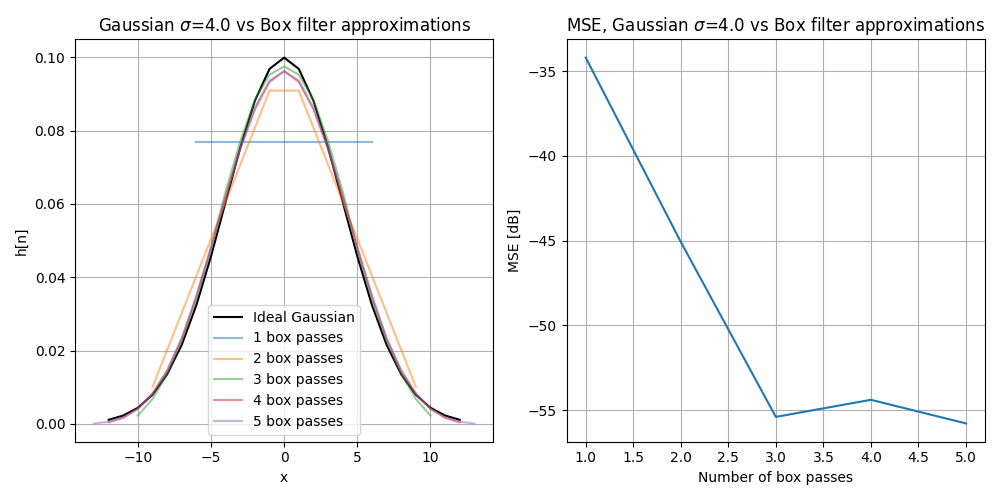

In [7]:
%use sos
# Declare slider for sigma
sigma_slider = widgets.FloatSlider(value=0.2, min=0.2, max=8, step=0.2, description='\u03C3', continuous_update=False) 

# Number of box passes
max_nr_passes = 5
ns = np.arange(1,max_nr_passes+1)

# Initialize figure
plt.close('all')
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plotting function - Callback for slider
def plot_approximation(change):
    # Get value of sigma, initialize variables of interest and clear axes
    sigma = change.new
    errors = []
    legends = []
    axs[0].clear()
    axs[1].clear()
    # Generate ideal Gaussian impulse response with the desired sigma and plot
    x_g, gauss_ideal = gen_ideal_gaussian(sigma)
    axs[0].plot(x_g, gauss_ideal,'k')
    # Iterate through box filters
    for p, n in enumerate(ns):
        # Get the size of the boxes to use
        boxes = boxes_for_gauss(sigma, n)
        # Generate mask and normalize 
        conv = np.ones(int(boxes[0]))/boxes[0]
        # Convolve box filter if necessary and generate new indexes
        for i in range(1, len(boxes)):
            box = np.ones(int(boxes[i]))/boxes[i]
            conv = np.convolve(conv, box)
        x_b = np.linspace(-conv.shape[0]//2+1, conv.shape[0]//2, conv.shape[0])
        # Calculate error and append to corresponding variable
        errors.append(calc_err(conv, gauss_ideal))
        # Plot box approximation and add legend
        legends.append(f'{n} box passes')
        axs[0].plot(x_b, conv, alpha=0.5)
    # Format plot
    axs[0].legend(['Ideal Gaussian'] + legends); axs[0].set_xlabel('x'); axs[0].set_ylabel('h[n]')
    axs[0].set_title(f'Gaussian $\sigma$={sigma} vs Box filter approximations'); axs[0].grid()
    axs[1].plot(ns, errors)
    axs[1].set_xlabel('Number of box passes'); axs[1].set_ylabel('MSE [dB]')
    axs[1].set_title(f'MSE, Gaussian $\sigma$={sigma} vs Box filter approximations'); axs[1].grid()
    fig.tight_layout()

# Didplay widget and link to callback
display(sigma_slider)
sigma_slider.observe(plot_approximation, 'value')
sigma_slider.value = 4

As you may have observed by setting $\sigma \leq 0.6$, this method does not work well for very small values of $\sigma$ since the box sizes are all 1. However, for values of $\sigma > 0.6$ it starts delivering good results. To illustrate the performance more clearly, run the next cell which plots the MSE between the approximation and the ideal Gaussian as a function of the standard deviation $\sigma$, with $\sigma$ ranging from $0.6$ to $10$. 

<div class="alert alert-info">

<b>Note:</b> You can change the number of box filters used for the approximation using the slider provided below the figure. Observe the effect this has on the MSE.
</div>

IntSlider(value=1, continuous_update=False, description='Number of box passes', layout=Layout(width='400px'), …

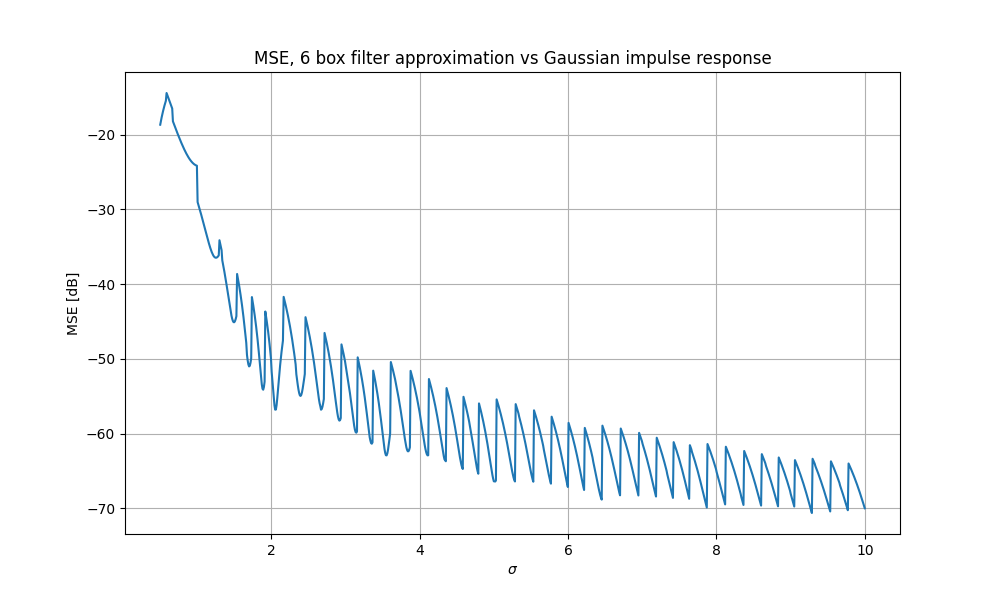

In [8]:
%use sos
# Initialize slider to define the number of box filters to use
box_slider = widgets.IntSlider(value=1, min=1, max=12, step=1, description='Number of box passes', continuous_update=False, 
                               style={'description_width':'initial'}, layout={'width':'400px'}) 

# Declare array with sigma values to evaluate
sigmas = np.linspace(0.5, 10, 1000)

# Initialize Matplotlib figure
plt.close("all")
fig = plt.figure(figsize = (10,6))
ax = plt.gca()

def plot_mse(change):
    # Get the necessary number of box filters, initialize variables and clear axes
    n = change.new
    ax.clear()
    errors = []
    # Iterate all sigmas
    for sigma in sigmas:
        # Get ideal gaussian
        _, gauss_ideal = gen_ideal_gaussian(sigma)
        # Perform box passes
        boxes = boxes_for_gauss(sigma, n)
        conv = np.ones(int(boxes[0]))/boxes[0]
        for i in range(1, len(boxes)):
            box = np.ones(int(boxes[i]))/boxes[i]
            conv = np.convolve(conv, box)
        # Calculate error and add to errors variable
        errors.append(calc_err(conv, gauss_ideal))
    ax.plot(sigmas, errors);
    ax.set_xlabel('$\sigma$'); ax.set_ylabel('MSE [dB]')
    ax.set_title(f'MSE, {n} box filter approximation vs Gaussian impulse response')
    ax.grid()
    
display(box_slider)
box_slider.observe(plot_mse, 'value')
box_slider.value = 6

## 1.B. Implementation of a separable accumulation box filter (4 points)
[Back to table of contents](#ToC_1_Orientation_warm_up)

Now that we have analyzed the behavior of the box filter approximation method, we're ready to begin with its efficient implementation. Based on the analysis of the MSE, we choose to approximate the Gaussian filter by applying a total of **4** box filters. This offers a good compromise between numerical accuracy and execution time. 

The reason why we chose the box filter is that we can implement it efficiently so that that its execution time does not depend on the size of the filter mask used. To achieve this, you will implement a **separable accumulator**. This is the same filter as the normal box filter, but exploits that the box filter mask is constant to save many computations. It relies on that the content below the mask centered at pixel $x[k]$ and at pixel $x[k+1]$ is nearly the same. The accumulator needs to be filled only for the first output pixel. Then, **for every new pixel, we simply need to add the contribution of the new pixel that is now below the mask and subtract the contribution of the last pixel that is no longer below the mask**. This makes the filter independent of its size: we only need to perform $2$ operations per pixel (besides the very first one in every row/column). A visual representation of an horizontal accumulation box filter of **size 5** using mirroring boundary conditions applied to the first row is given below.

<table><tr>
<td>
  <p align="center" style="padding: 0px">
    <img alt="Structuring elements" src="images/box_filter_gif_snapshots.png" width="550"><br>
    <em style="color: grey">Visual representation of the accumulation box filter.</em>  
  </p>
</td>
</tr></table>

**For 4 points**, implement the JavaScript functions `boxBlurH(img, size)` and `boxBlurV(img, size)` in the cell below, that apply the accumulation box filter of size `size` explained above to the horizontal (H) and vertical (V) axis respectively. Moreover, you will find that we have defined the function `gaussianBlur`, that takes as paremeters:
* `img`: Original image as an ImageAccess object,
* `boxes`: The size of the box filters to be used to approximate a Gaussian blur. 
 
and returns the blurred image. 

<div class="alert alert-info">

<b>Note:</b> Remember that the JS <code>ImageAccess</code> class takes care of the boundary conditions, so you can easily extract pixels at negative indexes or outside the range of the image without issues. See <a href='./Introductory.ipynb'>Lab 0: Introductory</a> and/or the <a href='https://biomedical-imaging-group.github.io/image-access/'>documentation</a> if you need a refresher.
</div>

In [102]:
%use javascript
// function that performs the horizontal accumulation box filter
function boxBlurH(img, size){
    var output = new Image(img.shape());
    
    // YOUR CODE HERE
    for (var y=0; y < img.ny; y++){
        var sum = 0;
        accu = img.getNbh(x_pos=0, y_pos=y, nx=size, ny=1);
        
        for (var i=0; i < size; i++){
            sum += accu.getPixel(i, 0);
        }
        output.setPixel(0, y, sum/size);
        
        for (var x=1; x < img.nx; x++){
            next_value = output.getPixel(x-1, y) + (img.getPixel(x+Math.floor(size/2), y) - img.getPixel(x-Math.floor(size/2)-1, y)) / size;
            output.setPixel(x, y, next_value);
        }
    }
    
    return output;
}
// function that performs the vertical accumulation box filter
function boxBlurV(img, size){
    var output = new Image(img.shape());
    
    // YOUR CODE HERE
    for (var x=0; x < img.nx; x++){
        var sum = 0;
        accu = img.getNbh(x_pos=x, y_pos=0, nx=1, ny=size);
        
        for (var i=0; i < size; i++){
            sum += accu.getPixel(0, i);
        }
        output.setPixel(x, 0, sum/size);
        
        for (var y=1; y < img.ny; y++){
            next_value = output.getPixel(x, y-1) + (img.getPixel(x, y+Math.floor(size/2)) - img.getPixel(x, y-Math.floor(size/2)-1)) / size;
            output.setPixel(x, y, next_value);
        }
    }
    
    return output;
}
// Fast gaussian filtering using box filters
function gaussBlur(img, boxes){
    // perform multiple passes of boxBlur
    var output = img.copy();
    for(var i=0; i < boxes.length; i++){
        output = boxBlurH(output, size=boxes[i]);
        output = boxBlurV(output, size=boxes[i]);
    }
    return output;
}

Now run the next three cells, which will respectively test `boxFilterH`, `boxFilterV`, and the combination of both on the function `gaussianBlur`. If any of the cells raises an error, make sure to understand the source of it and correct the corresponding function.

<div class = 'alert - alert-danger'>

<b>Note:</b> Remember that even if the following cells do not raise any error, the points for the functions are not guaranteed! Revise your solutions.
</div>

In [103]:
%use javascript
// perform sanity check on boxFilterH
var test_img = new Image(5,5);
test_img.setPixel(0, 0, 1);
test_img.setPixel(2, 2, 1);
test_img.setPixel(4, 4, 1);
var Hcomp = new Image([[2/3, 1/3, 0  , 0  , 0  ],
                       [0  , 0  , 0  , 0  , 0  ],
                       [0  , 1/3, 1/3, 1/3, 0  ],
                       [0  , 0  , 0  , 0  , 0  ],
                       [0  , 0  , 0  , 1/3, 2/3]]);
console.log('Input image:\n' + test_img.visualize(), '\nOutput of boxBlurH(test_img, 3):\n' + boxBlurH(test_img, 3).visualize());
if(boxBlurH(test_img, 3).imageCompare(Hcomp) == false){
    console.log('WARNING!\nThe expected output of boxBlurH(test_img, 3) is:\n' + Hcomp.visualize());
}else{
    console.log('Well done, your boxBlurH function passed the sanity check.');
}

Input image:
[[ 1 0 0 0 0 ]
 [ 0 0 0 0 0 ]
 [ 0 0 1 0 0 ]
 [ 0 0 0 0 0 ]
 [ 0 0 0 0 1 ]]
 
Output of boxBlurH(test_img, 3):
[[ 0.667 0.333 0.000 0.000 0.000 ]
 [ 0.000 0.000 0.000 0.000 0.000 ]
 [ 0.000 0.333 0.333 0.333 0.000 ]
 [ 0.000 0.000 0.000 0.000 0.000 ]
 [ 0.000 0.000 0.000 0.333 0.667 ]]

Well done, your boxBlurH function passed the sanity check.


In [104]:
%use javascript
// perform sanity check on boxFilterV
var test_img = new Image(5,5);
test_img.setPixel(0, 0, 1);
test_img.setPixel(2, 2, 1);
test_img.setPixel(4, 4, 1);
var Vcomp = new Image([[2/3, 0  , 0  , 0  , 0  ],
                       [1/3, 0  , 1/3, 0  , 0  ],
                       [0  , 0  , 1/3, 0  , 0  ],
                       [0  , 0  , 1/3, 0  , 1/3],
                       [0  , 0  , 0  , 0  , 2/3]]);
console.log('Intput image:\n' + test_img.visualize(), '\nOutput of boxBlurV(test_img, 3):\n' + boxBlurV(test_img, 3).visualize());
if(boxBlurV(test_img, 3).imageCompare(Vcomp) == false){
    console.log('WARNING!\nThe expected output of boxBlurV(test_img, 3) is:\n' + Vcomp.visualize());
}else{
    console.log('Well done, your boxBlurV function passed the sanity check.');
}

Intput image:
[[ 1 0 0 0 0 ]
 [ 0 0 0 0 0 ]
 [ 0 0 1 0 0 ]
 [ 0 0 0 0 0 ]
 [ 0 0 0 0 1 ]]
 
Output of boxBlurV(test_img, 3):
[[ 0.667 0.000 0.000 0.000 0.000 ]
 [ 0.333 0.000 0.333 0.000 0.000 ]
 [ 0.000 0.000 0.333 0.000 0.000 ]
 [ 0.000 0.000 0.333 0.000 0.333 ]
 [ 0.000 0.000 0.000 0.000 0.667 ]]

Well done, your boxBlurV function passed the sanity check.


In [105]:
%use javascript
// perform sanity check on gaussBlur which combines both boxBlurH and boxBlurV
var test_img = new Image(5,5);
test_img.setPixel(0, 0, 1);
test_img.setPixel(2, 2, 1);
test_img.setPixel(4, 4, 1);
var comp = new Image([[ 0.4444444444444444, 0.2222222222222222, 0,                  0,                  0                  ],
                      [ 0.2222222222222222, 0.2222222222222222, 0.1111111111111111, 0.1111111111111111, 0                  ],
                      [ 0,                  0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0                  ],
                      [ 0,                  0.1111111111111111, 0.1111111111111111, 0.2222222222222222, 0.2222222222222222 ],
                      [ 0,                  0,                  0,                  0.2222222222222222, 0.4444444444444444 ]]);
console.log('Intput image:\n' + test_img.visualize(), '\nOutput of gaussBlur(test_img, [3]):\n' + gaussBlur(test_img, [3]).visualize());
if(gaussBlur(test_img, [3]).imageCompare(comp) == false){
    console.log('WARNING!\nThe expected output of gaussBlur(test_img, [3]) is:\n' + comp.visualize());
}else{
    console.log('Good job, your gaussBlur function passed the sanity check.');
}

Intput image:
[[ 1 0 0 0 0 ]
 [ 0 0 0 0 0 ]
 [ 0 0 1 0 0 ]
 [ 0 0 0 0 0 ]
 [ 0 0 0 0 1 ]]
 
Output of gaussBlur(test_img, [3]):
[[ 0.444 0.222 0.000 0.000 0.000 ]
 [ 0.222 0.222 0.111 0.111 0.000 ]
 [ 0.000 0.111 0.111 0.111 0.000 ]
 [ 0.000 0.111 0.111 0.222 0.222 ]
 [ 0.000 0.000 0.000 0.222 0.444 ]]

Good job, your gaussBlur function passed the sanity check.


Now we have everything we need to compare the box filter approximation method to the usual separable Gaussian filter. First, we will compare the runtime of both methods as a function of the standard deviation $\sigma$ of the Gaussian. Run the next cell to define the $\sigma$s and generate the corresponding boxes using the `boxes_for_gauss` function you implemented in [Part 1.A.](#1.A.-Generating-the-box-filter-sizes-(1-point)).

Change the sigma values if you want, but beware that large sigmas can take a lot of time to run!

In [106]:
%use sos
# Declare sigmas and corresponding box filters for comparison
sigmas = [0.1, 1, 2, 3, 4, 5, 8]
boxes = [boxes_for_gauss(sig, 4).tolist() for sig in sigmas]

The cell below runs both smoothing methods for all the $\sigma$ values defined in the cell above on the image `dendrochronology`, which has a size of $512 \times 512$ pixels. Run the cell and wait for it to finish, then run the cell below it to visualize the runtime comparison results.

<div class="alert alert-info">

<b>Remember:</b> A cell is still running if you see <code>In [\*]</code> in the top-left corner. Once the asterisk (*) changes to a number, the cell has finished running.
</div>

In [107]:
%use javascript
%get dendrochronology
%get boxes
%get sigmas
%put time_fast
%put time_norm

dend_img = new Image(dendrochronology);
var errors = [];
var time_fast = [];
var time_norm = [];
// run the Gaussian smoothing for all sigma values and measure the runtime of both methods
var message = 'Running for \u03C3 = ';
for(var i = 0; i < boxes.length; i++){
    message = message + sigmas[i] + ", "
    process.stdout.write(message + "...\r" );
    var startTime = new Date();
    var dend_smooth_img = gaussBlur(dend_img, boxes[i]);
    var endTime = new Date();
    time_fast.push((endTime-startTime)/1000);
    var startTime = new Date();
    var dend_smooth_norm_img = gaussian(dend_img, sigmas[i]);
    var endTime = new Date();
    time_norm.push((endTime-startTime)/1000);
}
message = message.slice(0,-2) + ".     "
console.log(message)
console.log('Finished running for all the \u03C3 values.')

Running for σ = 0.1, 1, 2, 3, 4, 5, 8.     
Finished running for all the σ values.


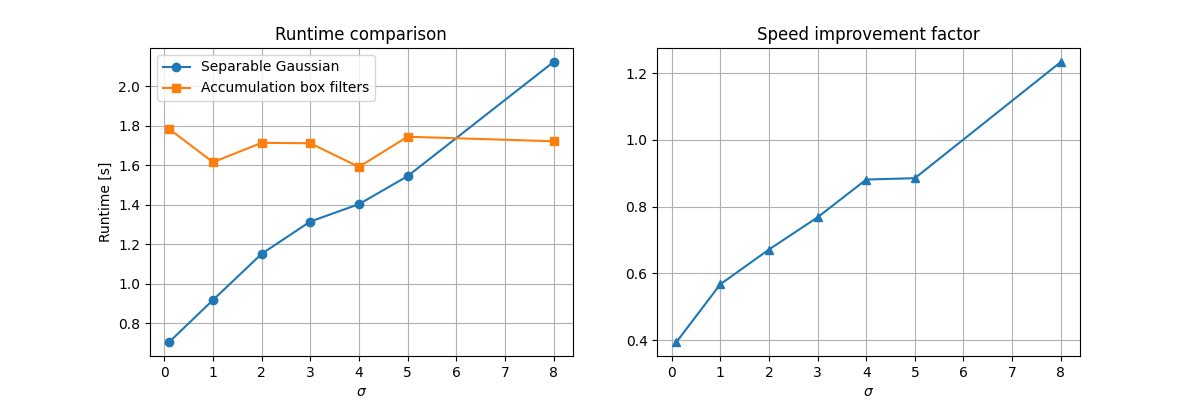

In [109]:
%use sos
# Plotting the runtime comparison results
plt.close('all') 
plt.figure(figsize=(12, 4))
# Plot runtime
plt.subplot(121)
plt.plot(sigmas, time_norm, marker='o')
plt.plot(sigmas, time_fast, marker='s')
plt.legend(['Separable Gaussian', 'Accumulation box filters'])
plt.xlabel('$\sigma$'); plt.ylabel('Runtime [s]')
plt.grid(); plt.title('Runtime comparison')
# Plot improvement factor
plt.subplot(122)
plt.plot(sigmas, np.array(time_norm)/np.array(time_fast),marker='^')
plt.xlabel('$\sigma$');
plt.grid(); plt.title('Speed improvement factor')
plt.show()

If you implemented the functions `boxBlurH` and `boxBlurV` correctly, you should see in the plot above that the runtime of the accumulation box filters stays more or less constant, no matter the value of $\sigma$. On the other hand, the runtime of the separable Gaussian increases linearly with the value of $\sigma$. If we would have compared the box filters to a non-separable version of the Gaussian filter, then you would probably still be waiting on the results, because the runtime of the non-separable Gaussian increases proportional to $\sigma^2$. Hopefully you can now clearly see the benefit of this method and why we went through the struggle of implementing it.

Finally, we should compare the accuracy of our method to one of the Gaussian blurs provided by the Python library. For this, we first define the sigmas and generate the corresponding boxes with the `boxes_for_gauss` function. Run the cell below to do so.

In [110]:
%use sos
# Change the sigma values if you want, don't worry about the runtime since we use the approximation method
sigmas = [0.5, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 22, 26, 30]
boxes = [boxes_for_gauss(sig, 4).tolist() for sig in sigmas]

The next cell applies the box filter approximation for all $\sigma$ values to the `dendrochronology` image and converts the result to Python so that we can compare it to the OpenCV Gaussian blur in the cell below it. Run both cells to see the average error per pixel as a function of $\sigma$.

In [111]:
%use javascript
%get dendrochronology
%get sigmas
%get boxes
%put outs

var outs = [];
dend_img = new Image(dendrochronology);
var message = 'Running for \u03C3 = ';
for(var i = 0; i < boxes.length; i++){
    message = message + sigmas[i] + ", "
    process.stdout.write( message + "...\r" );
    var dend_smooth_img = gaussBlur(dend_img, boxes[i]);
    outs.push(dend_smooth_img.toArray());
}
message = message.slice(0,-2) + ".     "
console.log(message)
console.log('Finished running for all the \u03C3 values.')

Running for σ = 0.5, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 22, 26, 30.     
Finished running for all the σ values.


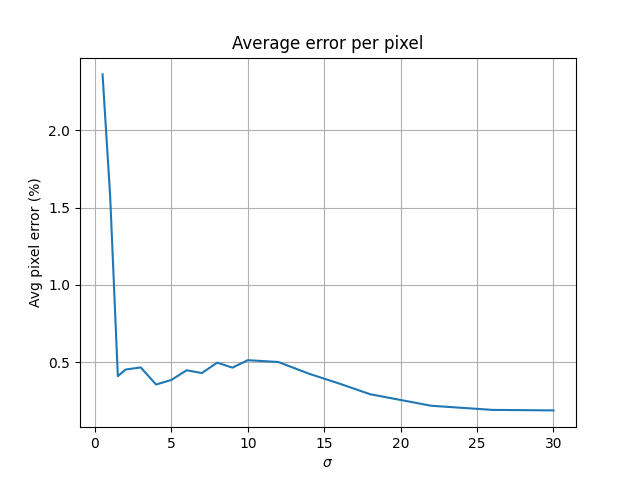

In [112]:
%use sos
# Visualize the average pixel error
errs = []
outs_cv =  []
for i, sigma in enumerate(sigmas):
    # Apply OpenCV gaussian blur
    outs_cv.append(cv.GaussianBlur(dendrochronology, ksize=(0,0), sigmaX=sigma, borderType=cv.BORDER_REFLECT))
    # Calculate average pixel error
    errs.append(np.mean(np.abs(outs_cv[i][outs_cv[i] > 0] - np.array(outs[i])[outs_cv[i] > 0])/outs_cv[i][outs_cv[i] > 0]) * 100)
# Display result
plt.close('all')
plt.figure('Average pixel error')
plt.plot(sigmas, errs); plt.xlabel('$\sigma$'); plt.ylabel('Avg pixel error (%)')
plt.title('Average error per pixel'); plt.grid()
plt.show()

As you can see, in accordance with the analysis we made in [Part 1.A.](#1.A.-Generating-the-box-filter-sizes), the approximation works very well with large $\sigma$s. Indeed, the average error per pixel stays below $0.5\%$, which is absolutely acceptable for most applications.

Finally run the cell below to visually compare the smoothed images.

In [114]:
%use sos
# Change the sigma index to see the result for different sigmas
sigma_idx = 18
# Give information to user
print(f'Average pixel error for \u03C3 = {sigmas[sigma_idx]}: {errs[sigma_idx]:.4}%')
plt.close('all')
img_list = [dendrochronology, outs_cv[sigma_idx], np.array(outs)[sigma_idx]]
title_list = ['Original Image', f'Gaussian smoothed $\sigma$={sigmas[sigma_idx]}', f'box filter smoothed $\sigma$={sigmas[sigma_idx]}']
view = viewer(img_list, title=title_list, subplots=(1,3))

Average pixel error for σ = 30: 0.1893%


Button(description='Show Widgets', style=ButtonStyle())

As a final note, as you may have observed during the comparison between your efficient Gaussian smoothing and OpenCV's Gaussian blur, OpenCV's version is still faster than your implementation. To completely understand how OpenCV manages to speed up the Gaussian filter goes beyond the scope of this course, but it has to do with the use low-level programming languages that are able to make use of performance primitives offered by your CPU. Performance primitives are special CPU-specific computational instructions that exploit the CPU's architecture to perform much faster calculations.

For simplicity and time reasons, we will use `cv.GaussianBlur` as our Gaussian filter for the upcoming labs. Still, if you ever need to implement a fast Gaussian smoothing and don't have access to a library like OpenCV, you now know how to start.

<div class="alert alert-success">

Congratulations on finishing this first warm-up lab of IP2! Hopefully you are now familiar with the basic tools we are going to use. Your next step now is to also complete the main first lab, <a href='./2_Orientation.ipynb'>Lab 4.2: Orientation</a>, which is more sophisticated and focuses on actual applications of the algorithms you are going to implement.
</div>

Make sure to save your notebook (you might want to keep a copy on your personal computer) and upload it to <a href="https://moodle.epfl.ch/course/view.php?id=463">Moodle</a>, **in a zip file with the other notebook of this lab.**

* Keep the name of the notebook as: *1_Orientation_warm_up.ipynb*,
* Name the `zip` file: *Orientation_lab.zip*.